<a href="https://colab.research.google.com/github/Hydenx2004/Time-series-lab/blob/main/Experiment9ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

In [75]:
df = pd.read_csv('dailymintemp.csv', parse_dates=['Date'], index_col='Date')

In [76]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [77]:
train = df[:250]
test = df[250:]

In [78]:
model = ARIMA(train, order=(2, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [79]:
y_forecast = model_fit.forecast(steps=30)

In [80]:
prediction = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [81]:
rms = root_mean_squared_error(test, prediction)
print(rms)

4.104648404067662


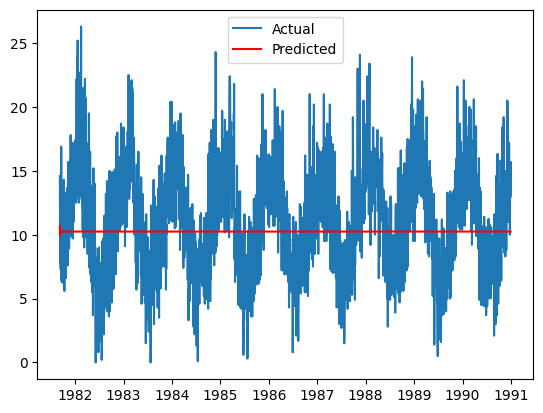

In [82]:
plt.plot(test, label='Actual')
plt.plot(prediction, label='Predicted', color='red')
plt.legend()